In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Get training and validation  Data
train_X = np.random.rand(1000,10)
val_X = np.random.rand(300,10)

train_Y = np.add(train_X[:,1]*0.6,train_X[:,2]*2) #+ np.random.normal(0,0.5,1000)
val_Y = np.add(val_X[:,1]*0.6,val_X[:,2]*2) #+ np.random.normal(0,0.5,300)


train_size = train_X.shape[0]
val_size = val_X.shape[0]
features_size = train_X.shape[1] #features size for one example 
output_size = 1

In [3]:
# Set Training Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 50
epochs = 50
batch_size = 28

In [4]:
#Create the net graph: 
# input : vector x s.t size of x = [1,features_size]
# output : scalar
# the net = 2 fc layers 
# objective : minimize  the euclidean loss

x = tf.placeholder(tf.float32, [None,features_size]) 
y = tf.placeholder(tf.float32, [None,output_size])


weights_1 = tf.Variable(
    tf.random_normal([features_size, 2048]))
biases_1 = tf.Variable(tf.ones([2048]))

weights_2 = tf.Variable(
    tf.truncated_normal([2048, output_size]))
biases_2 = tf.Variable(tf.ones(output_size))

layer_1 = tf.add(tf.matmul(x,weights_1),biases_1)
layer_1 = tf.nn.relu(layer_1)

layer_2 = tf.add(tf.matmul(layer_1,weights_2),biases_2)

pred = layer_2

# Mean euclidean distance
loss =  tf.reduce_mean(tf.sqrt(tf.pow(pred-y, 2)))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


In [5]:
# Returns batch of input X and corresponding lables Y 
#  data: numpy array contains all the input vectors
#  label: numpy array contains all the labels scalars
#  batch_i: indexs for the batch  
def get_batch(data,labels, bacth_i):
    X = np.reshape(data[bacth_i],(bacth_i.shape[0],data.shape[1]))
    Y = np.reshape(labels[bacth_i],(bacth_i.shape[0],1))
    return X,Y


In [6]:
#Start a session and train the network
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

train_loss = np.zeros(epochs)
val_loss = np.zeros(epochs)

for epoch in range(epochs):
    for i in range (round(train_size/batch_size)):
        # choose the batch randomly 
        batch_index = np.random.randint(0,train_size,batch_size)
        x_, y_ = get_batch(train_X,train_Y, batch_index)
        _, c = sess.run([optimizer, loss], feed_dict={x: x_, y:y_})
        train_loss[epoch] +=  (c*batch_size)/train_size
    #Validation 
    x_, y_ = get_batch(val_X,val_Y, np.arange(val_size))
    val_loss[epoch] = sess.run(loss, feed_dict={x: x_, y:y_}) 
    print("Epoch:", '%04d' % (epoch+1),
              "train =", "{:.9f}".format(train_loss[epoch]),
                "val =", "{:.9f}".format(val_loss[epoch]))

#print(sess.run([pred],feed_dict={x: train_X}))


Epoch: 0001 train = 285.451480820 val = 67.405700684
Epoch: 0002 train = 83.286491867 val = 32.347827911
Epoch: 0003 train = 31.835177925 val = 23.720573425
Epoch: 0004 train = 17.856782825 val = 12.593025208
Epoch: 0005 train = 11.088238544 val = 8.853067398
Epoch: 0006 train = 8.519371397 val = 9.219834328
Epoch: 0007 train = 5.943457087 val = 6.295301914
Epoch: 0008 train = 5.258818146 val = 3.172242165
Epoch: 0009 train = 3.941198856 val = 2.354306698
Epoch: 0010 train = 3.408477298 val = 2.238893986
Epoch: 0011 train = 2.997308942 val = 3.175542355
Epoch: 0012 train = 2.711713013 val = 2.415003777
Epoch: 0013 train = 2.410228239 val = 1.494509935
Epoch: 0014 train = 2.205339717 val = 2.119751692
Epoch: 0015 train = 1.941051988 val = 1.175874829
Epoch: 0016 train = 1.932165020 val = 1.600540757
Epoch: 0017 train = 1.761334816 val = 1.680292726
Epoch: 0018 train = 1.523352676 val = 1.075069427
Epoch: 0019 train = 1.288764942 val = 2.205192089
Epoch: 0020 train = 1.477039023 val = 1.

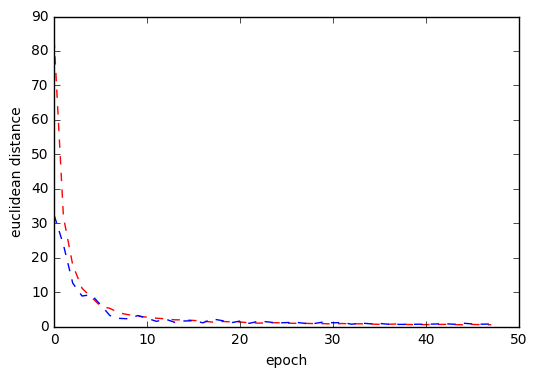

In [7]:
# plot the learning graph 
plt.plot(train_loss[1:-1], 'r--', val_loss[1:-1], 'b--')
plt.ylabel('euclidean distance')
plt.xlabel('epoch')
plt.show()

In [52]:
np.max(train_X)

4772.6266657772758